<a href="https://colab.research.google.com/github/NhaBaodang/AI_24_2/blob/main/MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


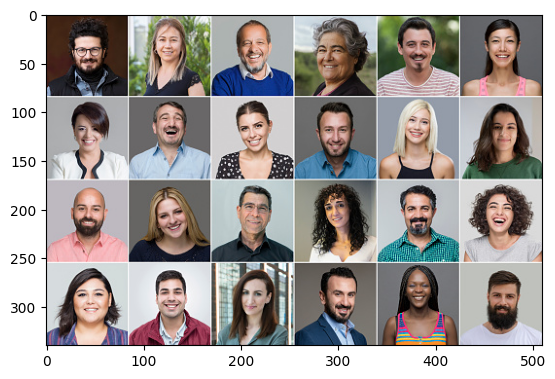

In [ ]:
img=plt.imread(jilename)
plt.imshow(img)


In [ ]:
detector = MTCNN()
faces= detector.detect_faces(img)
for face in faces:
  print(face)

6/6 [==============================] - 0s 38ms/step
{'box': [200, 183, 29, 40], 'confidence': 0.9999995827674866, 'keypoints': {'left_eye': (209, 197), 'right_eye': (222, 199), 'nose': (215, 206), 'mouth_left': (207, 212), 'mouth_right': (220, 214)}}
{'box': [198, 13, 29, 40], 'confidence': 0.9999991655349731, 'keypoints': {'left_eye': (206, 30), 'right_eye': (220, 29), 'nose': (213, 37), 'mouth_left': (207, 43), 'mouth_right': (221, 42)}}
{'box': [278, 20, 34, 47], 'confidence': 0.9999989867210388, 'keypoints': {'left_eye': (284, 37), 'right_eye': (299, 37), 'nose': (289, 45), 'mouth_left': (284, 52), 'mouth_right': (300, 52)}}
{'box': [370, 266, 25, 33], 'confidence': 0.9999882578849792, 'keypoints': {'left_eye': (376, 279), 'right_eye': (389, 278), 'nose': (383, 285), 'mouth_left': (376, 290), 'mouth_right': (390, 289)}}
{'box': [112, 93, 29, 40], 'confidence': 0.999987781047821, 'keypoints': {'left_eye': (122, 107), 'right_eye': (135, 107), 'nose': (129, 114), 'mouth_left': (122, 1

10/10 [==============================] - 1s 62ms/step
{'box': [361, 179, 34, 47], 'confidence': 0.9999999403953552, 'keypoints': {'left_eye': (370, 197), 'right_eye': (386, 196), 'nose': (378, 205), 'mouth_left': (371, 213), 'mouth_right': (386, 213)}}
{'box': [489, 262, 47, 56], 'confidence': 0.9999997019767761, 'keypoints': {'left_eye': (500, 283), 'right_eye': (520, 279), 'nose': (511, 293), 'mouth_left': (505, 302), 'mouth_right': (525, 298)}}
{'box': [356, 260, 33, 43], 'confidence': 0.9999995827674866, 'keypoints': {'left_eye': (365, 275), 'right_eye': (379, 274), 'nose': (372, 284), 'mouth_left': (366, 290), 'mouth_right': (382, 289)}}
{'box': [559, 344, 40, 55], 'confidence': 0.9999991059303284, 'keypoints': {'left_eye': (574, 366), 'right_eye': (592, 367), 'nose': (584, 379), 'mouth_left': (572, 384), 'mouth_right': (590, 385)}}
{'box': [426, 21, 28, 36], 'confidence': 0.9999989867210388, 'keypoints': {'left_eye': (433, 34), 'right_eye': (447, 35), 'nose': (440, 44), 'mouth_le

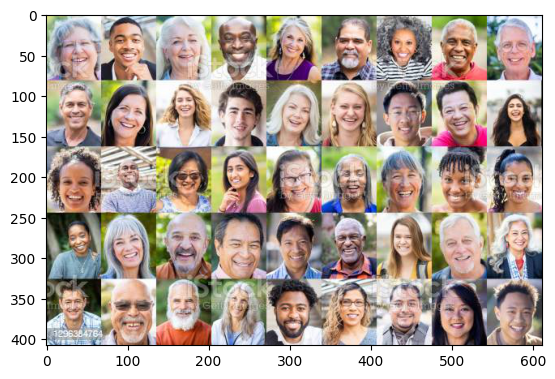

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename='/content/istockphoto-1296384764-612x612.jpg'
img = plt.imread(filename)
plt.imshow(img)
detector = MTCNN()
faces= detector.detect_faces(img)
for face in faces:
  print(face)

10/10 [==============================] - 0s 35ms/step


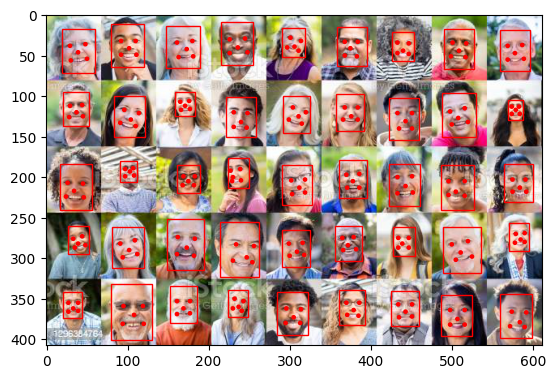

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from mtcnn import MTCNN

filename='/content/istockphoto-1296384764-612x612.jpg'
img = plt.imread(filename)

detector = MTCNN()
faces= detector.detect_faces(img)
ax = plt.gca()
for face in faces:
  x,y,width,height= face['box']
  rect = plt.Rectangle((x,y),width,height,fill = False,color ='red')
  ax.add_patch(rect)
  for key,value in face ['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.savefig('anh2.png')
plt.imshow(img)


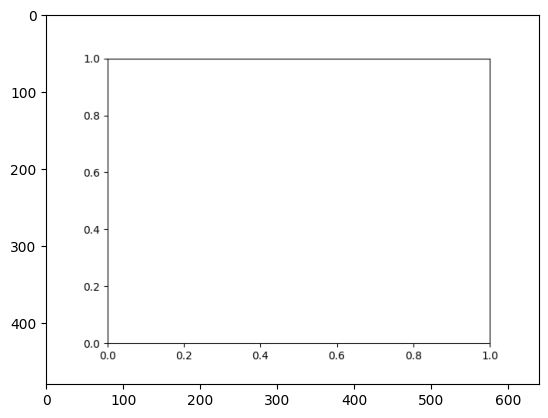

In [ ]:
img1 = plt.imread('anh2.png')
plt.imshow(img1)

10/10 [==============================] - 1s 39ms/step


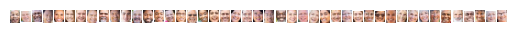

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from mtcnn import MTCNN

def draw_faces(filename,result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height = result_list[i]['box']
    x2,y2 = x1+ width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
    plt.savefig('anh{0}.png'.format(i))
  plt.show()
filename='/content/istockphoto-1296384764-612x612.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename,faces)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/don-cho-ve-nha.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n02099712', 'Labrador_retriever', 0.9544283), ('n02099601', 'golden_retriever', 0.03521993), ('n02134084', 'ice_bear', 0.002272659)]


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet',include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/chihuahua_0.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)


1/1 [==============================] - 1s 651ms/step


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

img_path = '/content/drive/MyDrive/Face/Bao_Nha/z4278491504251_0df9d9c054ebc087567a07e86ef130e9.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(features, top=3)[0])

1/1 [==============================] - 1s 680ms/step
Predicted: [('n03630383', 'lab_coat', 0.5360892), ('n02883205', 'bow_tie', 0.13979483), ('n04162706', 'seat_belt', 0.034517482)]


87910968/87910968 [==============================] - 1s 0us/step


ValueError: ignored